<center>
<h1>Breast Cancer Classification Model</h1>
<img src="https://cdn-icons-png.freepik.com/128/5963/5963750.png" style="width:200px; height:auto;">
<p style="font-size:15px;">In recent years, diagnosing breast tumors has become one of the most significant challenges in the medical field, as early diagnosis can greatly impact treatment outcomes and chances of recovery. Malignant breast tumors pose a considerable risk to patients' lives and require intensive medical intervention, while benign tumors are generally less harmful. This highlights the need for effective tools that can assist doctors in accurately and easily distinguishing between malignant and benign breast tumors.
This project aims to develop a machine learning model, to provide a tool that helps doctors determine the nature of breast tumors based on their characteristics. This model can offer substantial value in supporting medical decisions by providing a quick preliminary diagnosis, potentially reducing the need for complex diagnostic procedures and saving doctors both time and effort.
</p>
</center>

<h3>Preprocessing and Visualization</h3>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('breast_cancer.csv')
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [5]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [6]:
n=df.isnull().sum()
print(n)

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [7]:
df.shape

(683, 10)

In [8]:
df['Class'].value_counts()

Class
0    444
1    239
Name: count, dtype: int64

In [9]:
df.groupby('Class').mean()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Class,,,,,,,,,
0,2.963964,1.306306,1.414414,1.346847,2.108108,1.346847,2.083333,1.261261,1.065315
1,7.188285,6.577406,6.560669,5.585774,5.326360,7.627615,5.974895,5.857741,2.602510


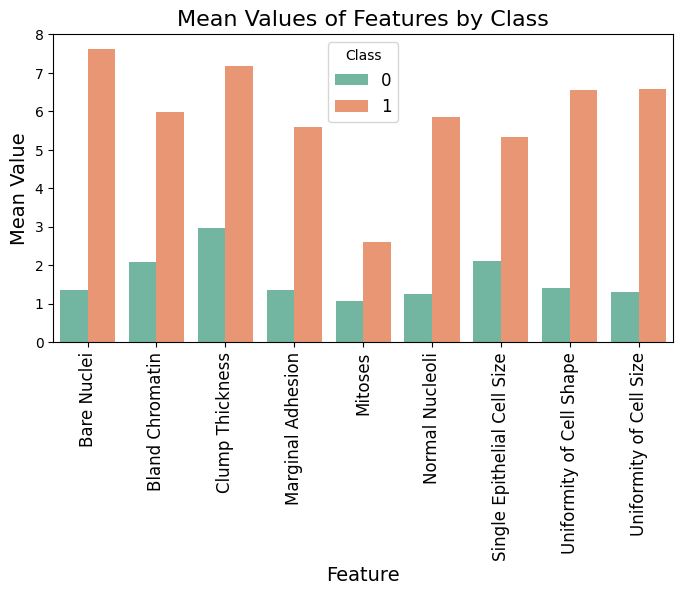

In [10]:
df_melted = df.melt(id_vars=["Class"], var_name="Feature", value_name="Value")
df_melted = df_melted.groupby(['Class', 'Feature'])['Value'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x="Feature", y="Value", hue="Class", data=df_melted, palette="Set2")

plt.title('Mean Values of Features by Class', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Mean Value', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.legend(title='Class', fontsize=12)
plt.show()

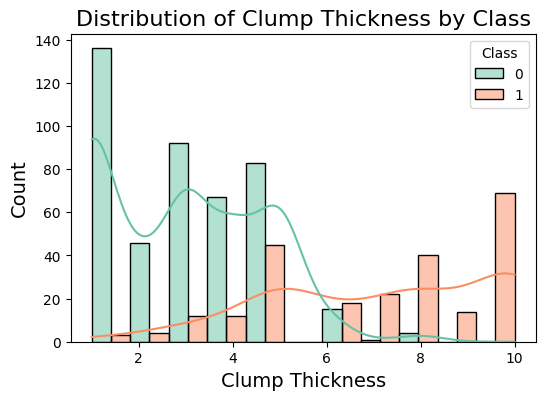

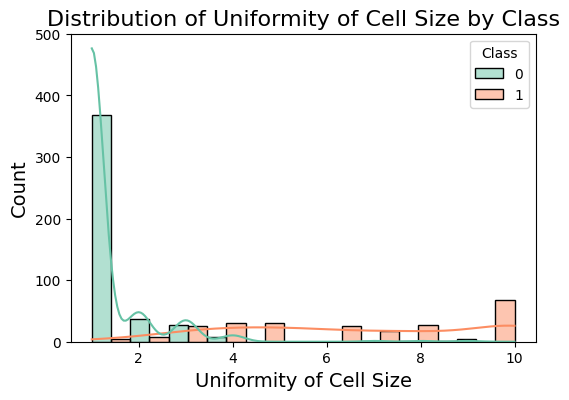

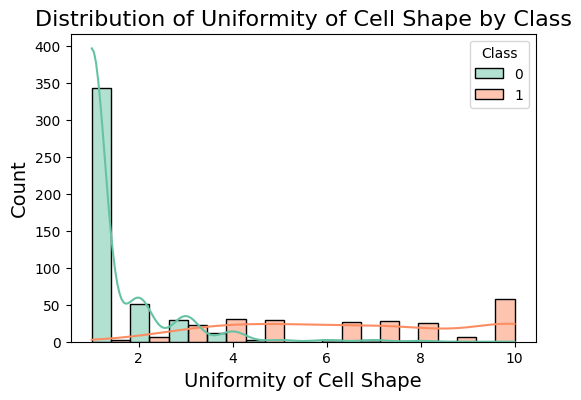

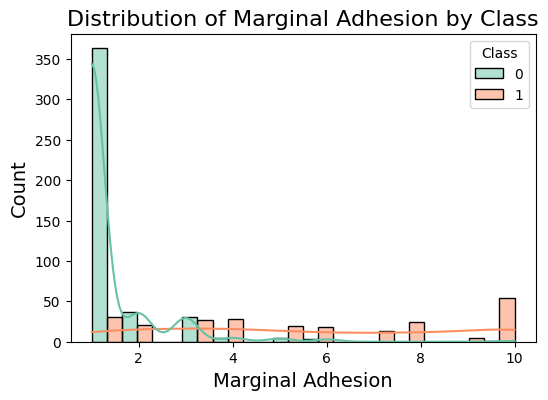

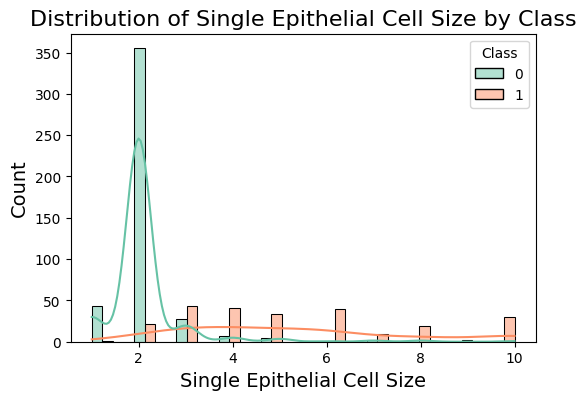

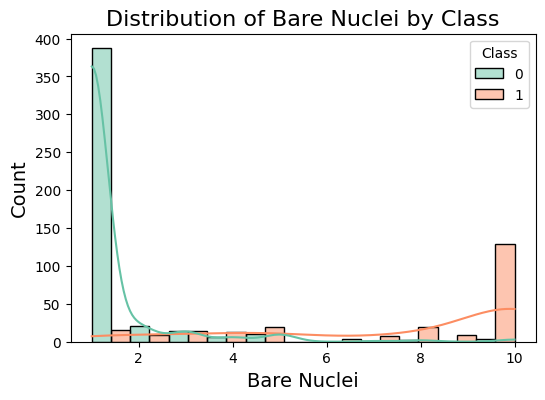

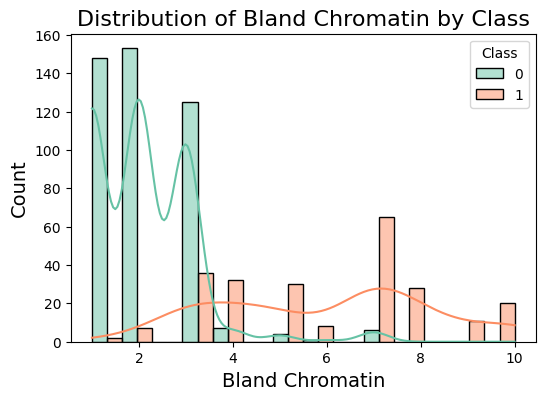

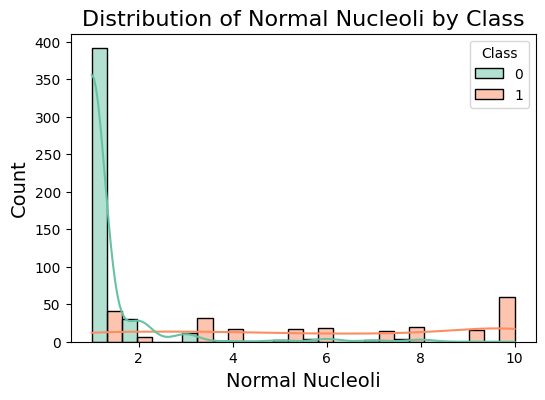

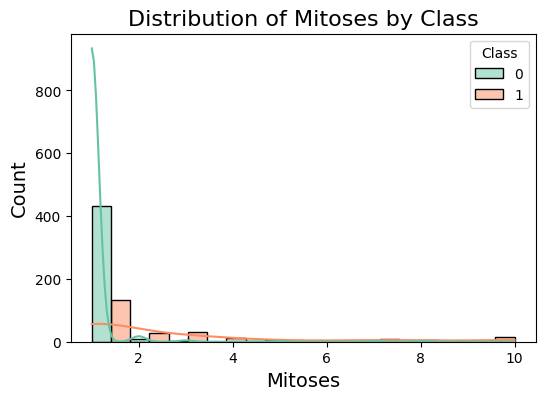

In [11]:
selected_features = df.drop(columns=["Class"])
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='Class', multiple='dodge', palette='Set2', kde=True)
    plt.title(f'Distribution of {feature} by Class', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.show()

In [12]:
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].unique())
    print("-" * 30)

Column: Clump Thickness
[ 5  3  6  4  8  1  2  7 10  9]
------------------------------
Column: Uniformity of Cell Size
[ 1  4  8 10  2  3  7  5  6  9]
------------------------------
Column: Uniformity of Cell Shape
[ 1  4  8 10  2  3  5  6  7  9]
------------------------------
Column: Marginal Adhesion
[ 1  5  3  8 10  4  6  2  9  7]
------------------------------
Column: Single Epithelial Cell Size
[ 2  7  3  1  6  4  5  8 10  9]
------------------------------
Column: Bare Nuclei
[ 1 10  2  4  3  9  7  5  8  6]
------------------------------
Column: Bland Chromatin
[ 3  9  1  2  4  5  7  8  6 10]
------------------------------
Column: Normal Nucleoli
[ 1  2  7  4  5  3 10  6  9  8]
------------------------------
Column: Mitoses
[ 1  5  4  2  3  7 10  8  6]
------------------------------
Column: Class
[0 1]
------------------------------


<Axes: >

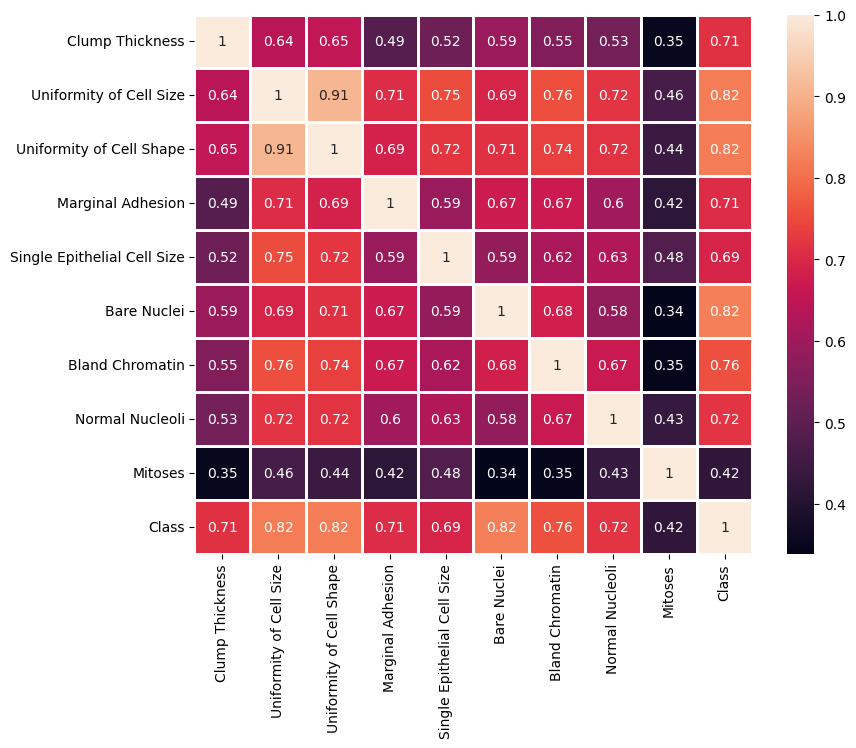

In [13]:
plt.figure(figsize=(9, 7))
sns.heatmap(df.corr(),annot=True,linewidths=1)

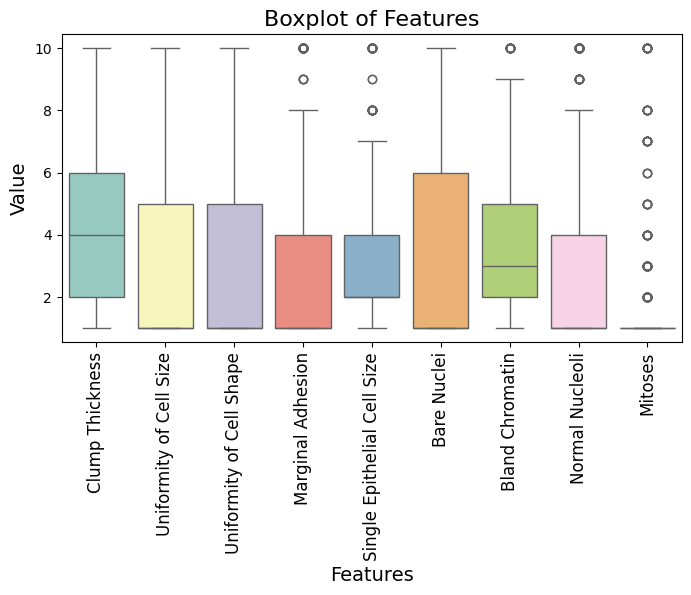

In [14]:
df_melted = df.drop(columns=["Class"]).melt(var_name="Feature", value_name="Value")

plt.figure(figsize=(8, 4))
sns.boxplot(x="Feature", y="Value", data=df_melted, hue="Feature", palette="Set3", legend=False)
plt.title('Boxplot of Features', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.show()

In [15]:
df = df.drop(columns=['Mitoses'], axis=1)

<h3>Training</h3>

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Class', axis=1)
Y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(683, 8) (546, 8) (137, 8)


<h4>Logistic Regression:</h4>

In [18]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(X_train, Y_train)

LogisticRegression()

<h4>Random Forest:</h4>

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=300)

<h4>Naive Bayes:</h4>

In [20]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train, Y_train)

GaussianNB()

<h3>Evaluation</h3>

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

<h4>Logistic Regression:</h4>

In [22]:
X_train_prediction = lrc.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.9706959706959707


In [23]:
X_test_prediction = lrc.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9854014598540146


In [24]:
cross_val_score(lrc, X, Y, cv=5).mean()

0.9634499785315587

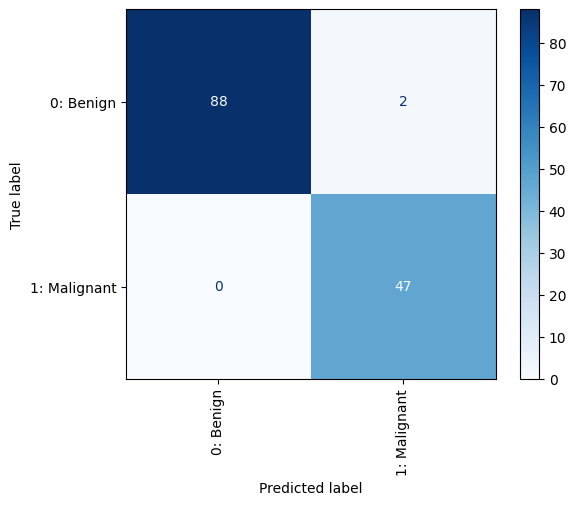

In [25]:
ConfusionMatrixDisplay.from_estimator(
    lrc, X_test, Y_test, 
    display_labels=['0: Benign', '1: Malignant'], 
    cmap='Blues', 
    xticks_rotation='vertical'
)

In [27]:
Y_predicted = lrc.predict(X_test)
f1 = f1_score(Y_test, Y_predicted)
print("F1-score:", f1)

F1-score: 0.9791666666666666


In [28]:
Y_predicted = lrc.predict(X_test)
print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        90
           1       0.96      1.00      0.98        47

    accuracy                           0.99       137
   macro avg       0.98      0.99      0.98       137
weighted avg       0.99      0.99      0.99       137



<h4>Random Forest:</h4>

In [29]:
X_train_prediction = rfc.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  1.0


In [30]:
X_test_prediction = rfc.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9781021897810219


In [31]:
cross_val_score(rfc, X, Y, cv=5).mean()

0.9707599828252469

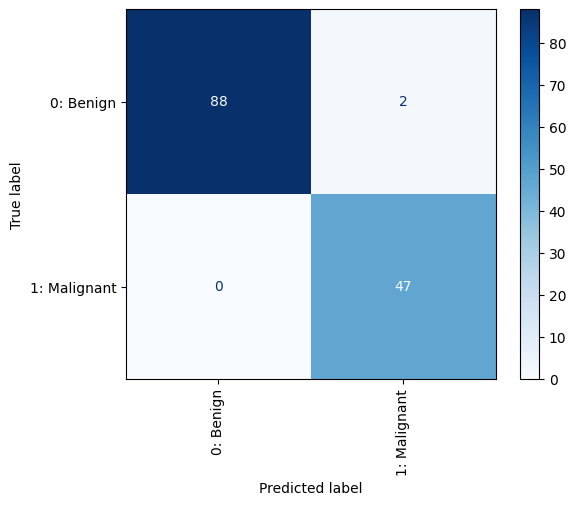

In [32]:
ConfusionMatrixDisplay.from_estimator(
    lrc, X_test, Y_test, 
    display_labels=['0: Benign', '1: Malignant'], 
    cmap='Blues', 
    xticks_rotation='vertical'
)

In [33]:
Y_predicted = rfc.predict(X_test)
f1 = f1_score(Y_test, Y_predicted)
print("F1-score:", f1)

F1-score: 0.9690721649484536


In [34]:
Y_predicted = rfc.predict(X_test)
print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        90
           1       0.94      1.00      0.97        47

    accuracy                           0.98       137
   macro avg       0.97      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137



<h4>Naive Bayes:</h4>

In [35]:
X_train_prediction = nbc.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.9633699633699634


In [36]:
X_test_prediction = nbc.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9781021897810219


In [37]:
cross_val_score(nbc, X, Y, cv=5).mean()

0.963439244310863

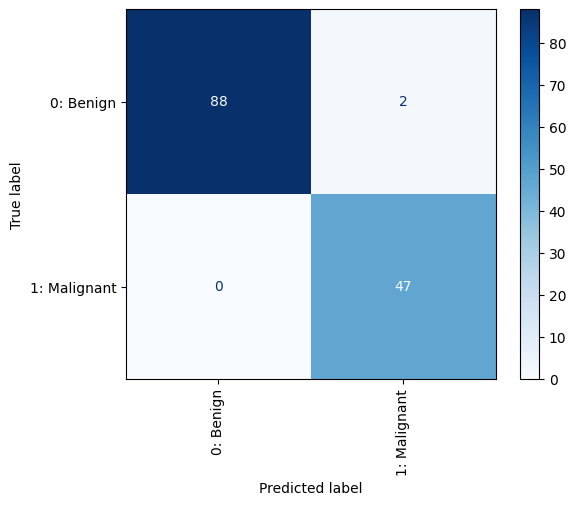

In [38]:
ConfusionMatrixDisplay.from_estimator(
    lrc, X_test, Y_test, 
    display_labels=['0: Benign', '1: Malignant'], 
    cmap='Blues', 
    xticks_rotation='vertical'
)

In [39]:
Y_predicted = nbc.predict(X_test)
f1 = f1_score(Y_test, Y_predicted)
print("F1-score:", f1)

F1-score: 0.9690721649484536


In [40]:
Y_predicted = nbc.predict(X_test)
print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        90
           1       0.94      1.00      0.97        47

    accuracy                           0.98       137
   macro avg       0.97      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137



<h3>Prediction</h3>

In [41]:
patient1=[[5,10,10,5,4,5,4,4]] # 1
print("Logistic Regression Prediction is", lrc.predict(patient1)[0])
print("Random Forest Prediction is", rfc.predict(patient1)[0])
print("Naive Bayes Prediction is", nbc.predict(patient1)[0])

Logistic Regression Prediction is 1
Random Forest Prediction is 1
Naive Bayes Prediction is 1


C:\Users\Sroor For Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Sroor For Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Sroor For Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [42]:
patient2=[[5,1,1,1,2,1,3,1]] # 0
print("Logistic Regression Prediction is", lrc.predict(patient2)[0])
print("Random Forest Prediction is", rfc.predict(patient2)[0])
print("Naive Bayes Prediction is", nbc.predict(patient2)[0])

Logistic Regression Prediction is 0
Random Forest Prediction is 0
Naive Bayes Prediction is 0


C:\Users\Sroor For Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Sroor For Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Sroor For Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
